In [228]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import pearsonr, shapiro, spearmanr
import pingouin as pg

In [137]:
spectra = pd.read_csv('./data/viral_spectra_dataset.csv').query('df == "nemu"')
spectra['taxid'] = spectra['taxid'].astype(int)
# spectra = spectra.melt(['Type', 'taxname', 'virusname'], 
#         spectra.columns[:12], 'Mut', 'Rate').sort_values(['virusname', 'Mut'])
spectra.head()

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.008852,0.143715,0.014274,0.079285,0.000000,0.198377,0.334457,0.000000,0.058034,0.031512,0.126587,0.004907,-,Influenza A virus,nemu,11320,flu_a
4,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw


## Explore mutations features

In [4]:
mut_raw = pd.read_csv('./data/allmut_nemu.csv')
mut_ns = mut_raw[mut_raw['Label'] == 0]
mut_ns

,Mut,Label,PosInGene,PosInCodon,RefCodon,AltCodon,RefAa,AltAa,ProbaRef,ProbaMut,ProbaFull,RefNode,AltNode,Gene,taxid,Type,taxname,df,virusname
0,A[G>A]A,0,29,2,AGA,AAA,R,K,0.316040,0.301881,0.301881,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
2,G[C>T]C,0,773,2,GCC,GTC,A,V,0.645726,0.321229,0.321229,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
3,A[G>A]C,0,776,2,AGC,AAC,S,N,0.657652,0.314946,0.314946,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
4,C[A>G]C,0,797,2,CAC,CGC,H,R,0.574844,0.342262,0.342262,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
5,A[G>A]G,0,904,1,GGA,AGA,G,R,0.736543,0.713864,0.713864,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594233,A[A>T]T,0,812,2,AAT,ATT,N,I,0.997930,0.997930,0.997930,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594235,C[A>G]C,0,1391,2,CAC,CGC,H,R,0.987528,0.987528,0.987528,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594244,A[G>A]C,0,68,2,AGC,AAC,S,N,0.999620,0.999620,0.999620,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV
594246,G[G>T]C,0,1153,1,GCT,TCT,A,S,0.999950,0.999950,0.999950,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV


In [201]:
# count nonsyn muts in branches
branch_mut_cnt = mut_ns.groupby(['Type', 'virusname', 'AltNode']).ProbaFull.sum()\
    .rename('BranchMutCount').reset_index()
branch_mut_cnt

,Type,virusname,AltNode,BranchMutCount
0,+,ACoV,Node10,0.996030
1,+,ACoV,Node100,2.433461
2,+,ACoV,Node101,1.914011
3,+,ACoV,Node103,1.338484
4,+,ACoV,Node104,1.968708
...,...,...,...,...
12160,ds,aorv,RN_95,2.903811
12161,ds,aorv,RN_96,5.933409
12162,ds,aorv,RN_97,3.316553
12163,ds,aorv,RN_98,2.000000


<Axes: xlabel='virusname', ylabel='BranchMutCount'>

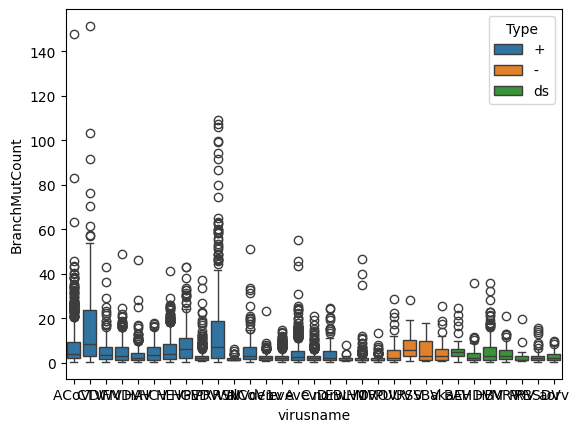

In [203]:
sns.boxplot(data=branch_mut_cnt, hue='Type', x='virusname', y='BranchMutCount')

In [6]:
from pymutspec.annotation import mutations_summary

_ = mutations_summary(mut_raw, 'taxname')
_.to_csv('./data/mutation_summary_vir.csv')  # Supl Table 1
_

,non-syn,syn,syn4f,Stop loss
taxname,,,,
Akabane orthobunyavirus,428.0,4194.0,1495.0,0.0
Alphacoronavirus 1,1044.0,3234.0,1507.0,0.0
Avian coronavirus,8300.0,52229.0,24712.0,0.0
Avian orthoreovirus,458.0,14981.0,8748.0,0.0
Banna virus,354.0,3818.0,1717.0,0.0
Citrus tristeza virus,2281.0,5747.0,2959.0,0.0
Deformed wing virus,1758.0,14711.0,6977.0,0.0
Dengue virus,975.0,4977.0,2423.0,0.0
Enterovirus A,2911.0,39710.0,19074.0,0.0


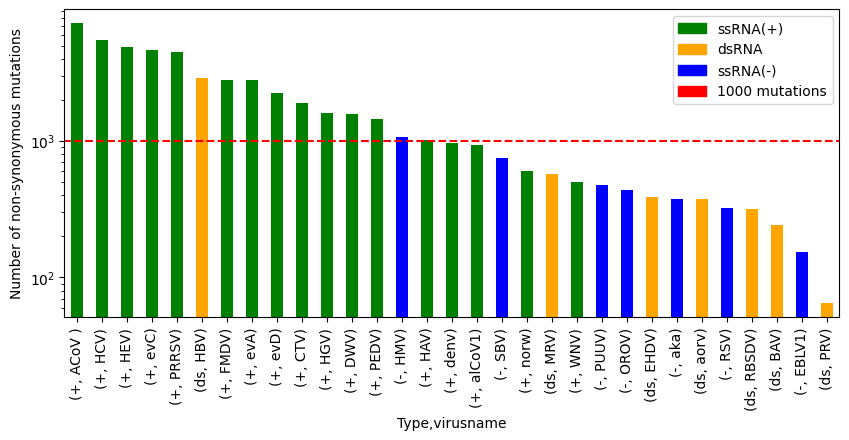

In [7]:
_d = mut_ns.groupby(['Type', 'virusname']).ProbaFull.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
_d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))

plt.hlines(y=1000, xmin=-1, xmax=mut_raw['virusname'].nunique(), color='red', linestyle='--')
plt.ylabel('Number of non-synonymous mutations')
plt.yscale('log')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': '1000 mutations'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
# plt.savefig('figures/ns_mut_cnt.pdf', bbox_inches='tight')
plt.show()

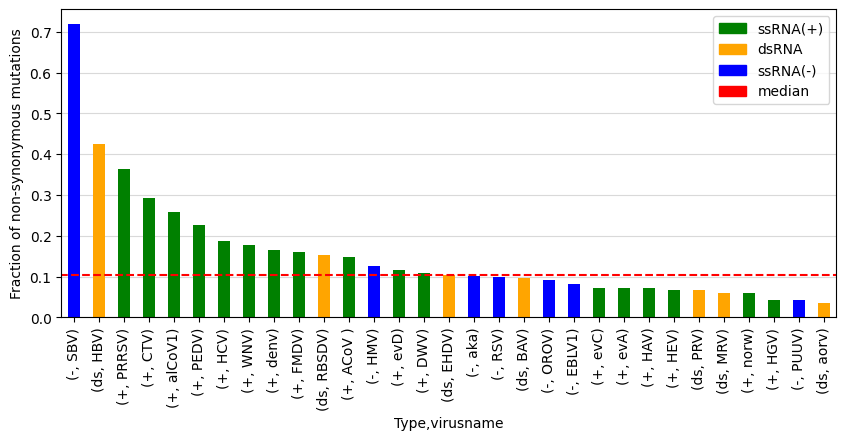

In [8]:
dnds = mut_raw.groupby(['Type', 'virusname', 'Label']).ProbaFull.sum().unstack()
dnds['Dn'] = dnds[0]
dnds['Ds'] = dnds[1] + dnds[2]
dnds['DnDs'] = dnds['Dn'] / (dnds['Dn'] + dnds['Ds'])

_d = dnds.DnDs.sort_values(ascending=False)


plt.figure(figsize=(10, 4))
ax = _d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': 'median'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.grid(axis='y', color='.85')
ax.set_axisbelow(True)
plt.ylabel('Fraction of non-synonymous mutations')
# plt.savefig('figures/ns_mut_frac.pdf', dpi=300, bbox_inches='tight')
plt.show()

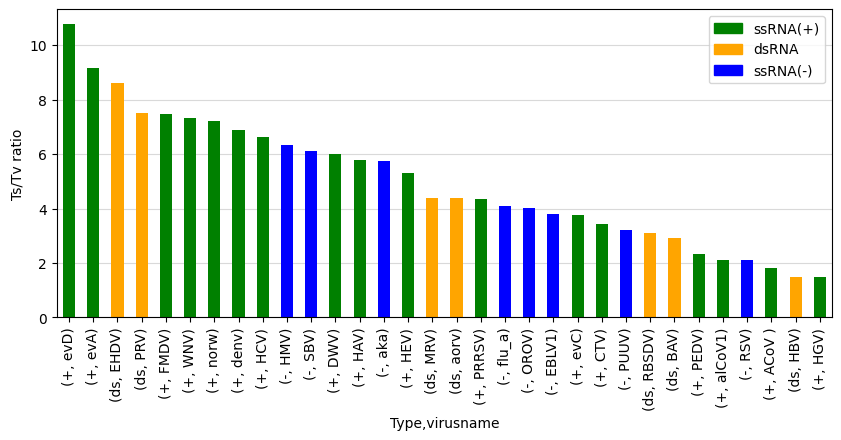

In [9]:
ts = spectra['C>T'] + spectra['T>C'] + spectra['A>G'] + spectra['G>A']
tv = spectra.iloc[:, :12].sum(1) - ts
spectra['ts_tv'] = ts / tv

_d = spectra.set_index(['Type', 'virusname', ]).ts_tv.sort_values(ascending=False)

plt.figure(figsize=(10, 4))
ax = _d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
# plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)',}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.grid(axis='y', color='.85')
ax.set_axisbelow(True)
plt.ylabel('Ts/Tv ratio')
# plt.savefig('figures/tstv.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Neutral model fit results

In [151]:
vir_fit = pd.read_csv('data/virs_rnd_fit_metrics.csv')
vir_fit.head()

,Type,virusname,model,replica,r2,mape,wape,slope,intercept,spearman_corr,...,pearson_corr_squared,pearson_p,ks_stat,ks_p,rmse,log_likelihood,mut_count,mut_type_count,corr_chem_vs_rel_freq,corr_chem_vs_rel_freq_pval
0,+,ACoV,neutral,1,0.132246,1.98694,0.745437,0.320324,0.004531,0.579993,...,0.201824,8.093140e-09,0.206667,3.220730e-03,0.009181,-5.81193,7281.83,148,-0.285082,0.000406
1,+,ACoV,random,1,0.058897,3.04650,0.856132,0.153687,0.005642,0.326972,...,0.095058,1.238290e-04,0.306667,1.247810e-06,0.009562,-5.92992,7281.83,148,-0.346942,0.000014
2,+,ACoV,random,2,-0.046287,3.33681,0.935977,0.052904,0.006314,0.237107,...,0.018402,9.788940e-02,0.393333,9.582440e-11,0.010082,-6.02723,7281.83,148,-0.188957,0.020570
3,+,ACoV,random,3,-0.116690,3.51821,0.975557,0.080812,0.006128,0.194977,...,0.023465,6.128220e-02,0.260000,7.268420e-05,0.010415,-6.30615,7281.83,148,0.053327,0.516905
4,+,ACoV,random,4,-0.086294,3.27471,0.959684,0.069742,0.006202,0.237221,...,0.021543,7.308400e-02,0.280000,1.388330e-05,0.010273,-6.08541,7281.83,148,-0.189974,0.019887


In [139]:
vir_fit.virusname.nunique()

30

In [141]:
vir_info = pd.read_csv('./data/viral_taxid_info_be.csv')
vir_info = vir_info.merge(spectra[['taxid', 'virusname']], how='left', on='taxid')
vir_info.head(2)

,taxid,species,host,gene,comment,Type,genus,family,order,class,...,kingdom,superkingdom,Nucleotide_Count,sequences,nucleotide_sites,ObsNum,TsTv,nsyn,n[syn+nonsyn],virusname
0,38170,Avian orthoreovirus,NaN,NaN,NaN,ds,Orthoreovirus__10882,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,...,Orthornavirae__2732396,Viruses__10239,4363.0,199.0,4011.0,7773.59970,4.380178,7773.604393,8108.191344,aorv
1,1157337,Piscine orthoreovirus,NaN,NaN,NaN,ds,Orthoreovirus__10882,Reoviridae__10880,Reovirales__2732541,Resentoviricetes__2732459,...,Orthornavirae__2732396,Viruses__10239,2478.0,79.0,4049.0,127.90358,7.512918,127.903582,149.666582,PRV


In [211]:
d_to_eq = pd.read_csv('./data/distance_to_eq.csv', index_col=0)

<Axes: >

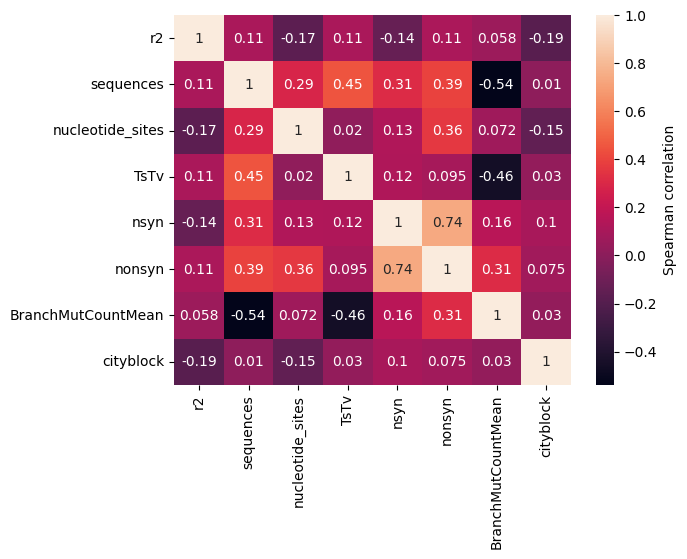

In [213]:
_ = vir_fit.query('model == "neutral"').merge(vir_info.iloc[:, -7:], how='left', on='virusname')
_['nonsyn'] = _['n[syn+nonsyn]'] - _['nsyn']
_ = _.merge(branch_mut_cnt.groupby(['Type', 'virusname']).BranchMutCount.mean()\
            .rename('BranchMutCountMean').reset_index(), how='left')
_ = _.merge(d_to_eq, how='left', on=['virusname'])

df_corr = _[[ 'r2', 'sequences', 'nucleotide_sites', 
             'TsTv', 'nsyn', 'nonsyn', 'BranchMutCountMean', 'cityblock',
             ]].corr('spearman')
sns.heatmap(df_corr, annot=True, cbar_kws={'label': 'Spearman correlation'})

<Axes: >

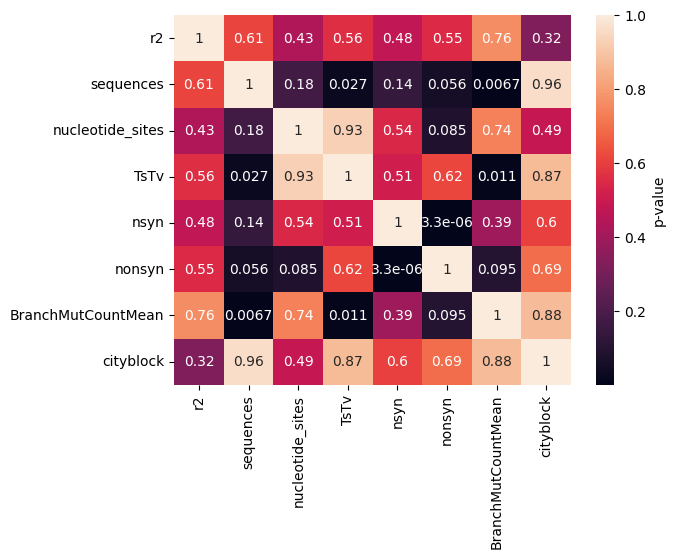

In [215]:
df_corr = _[[ 'r2', 'sequences', 'nucleotide_sites', 'TsTv', 
             'nsyn', 'nonsyn', 'BranchMutCountMean', 'cityblock']]\
    .corr(method=lambda x, y: spearmanr(x, y)[1])
# mask for the diagonal
# mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, cbar_kws={'label': 'p-value'})
# df_corr

                 W      pval  normal
eq_d_cat                            
far       0.858208  0.022741   False
close     0.701942  0.000261   False


,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,eq_d_cat,close,far,False,False,150.0,two-sided,0.12486,0.715207


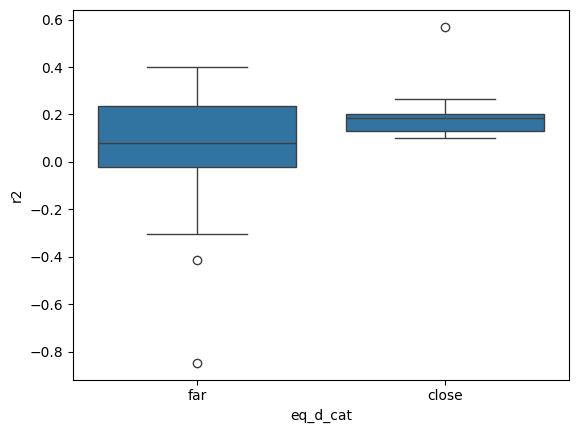

In [242]:
_['eq_d_cat'] = 'medium'
_.loc[_.cityblock > _.cityblock.quantile(0.5), 'eq_d_cat'] = 'far'
_.loc[_.cityblock < _.cityblock.quantile(0.5), 'eq_d_cat'] = 'close'

sns.boxplot(data=_, x='eq_d_cat', y='r2')
print(pg.normality(data=_, dv='r2', group='eq_d_cat'))
pg.pairwise_tests(data=_, dv='r2', between='eq_d_cat', parametric=False)

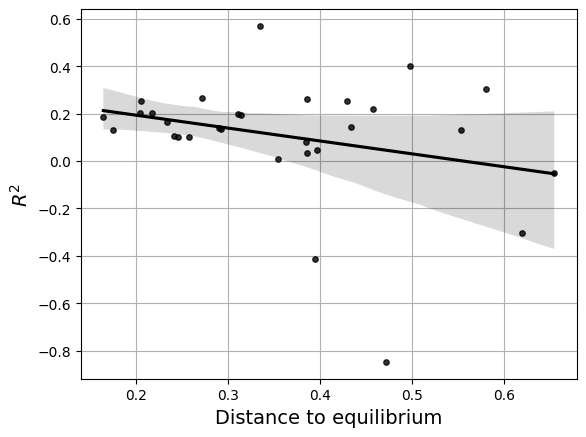

In [247]:
ax=sns.regplot(_, 
               x='cityblock', y='r2', color='k', 
               scatter_kws={'s': 15})
plt.grid()
ax.set_axisbelow(True)
plt.ylabel('$R^2$', fontdict={'size': 14})
plt.xlabel('Distance to equilibrium', fontdict={'size': 14})
plt.show()

# print(shapiro(_['r2']))
# print(shapiro(_['mut_count']))
# print(spearmanr(_['r2'], _['mut_count']))

DWV
HAV
PEDV
alCoV1


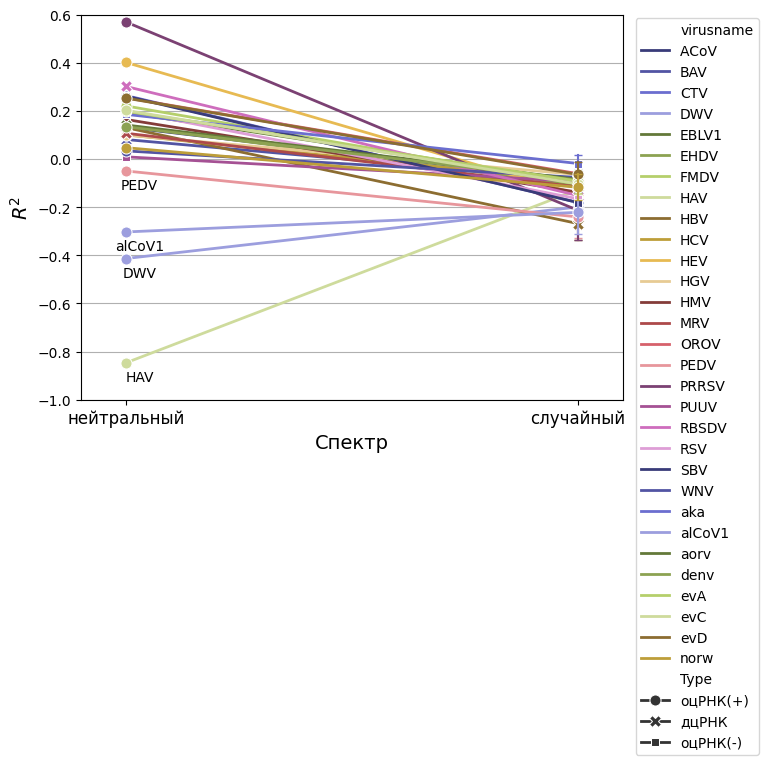

In [190]:
_ = vir_fit.copy() 
# _['Type'] = _['Type'].map({'+': 'ssRNA(+)', 'ds': 'dsRNA', '-': 'ssRNA(-)'})
_['Type'] = _['Type'].map({'+': 'оцРНК(+)', 'ds': 'дцРНК', '-': 'оцРНК(-)'})
_['спектр'] = _.model.map({'neutral': 'нейтральный', 'random': 'случайный'})

plt.figure(figsize=(7, 5))
ax = sns.lineplot(
    _, x='спектр', y='r2', hue='virusname', style='Type', 
    markers=True, dashes=False, palette='tab20b', 
    linewidth=2, markersize=8, err_style='bars', err_kws={'capsize':3}
)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_title('')
# ax.set_xticks(range(1, 6))
ax.set_ylim(-1, 0.6)
ax.set_xlim(-0.1, 1.1)
ax.set_ylabel('$R^2$', fontsize=14)
ax.set_xlabel('Спектр', fontsize=14)

for i, ser in vir_fit.query('model == "neutral" & r2 < 0').iterrows():
    vir = ser['virusname']
    r2 = ser['r2']
    ax.text(0.03, r2-0.06, vir, horizontalalignment='center', verticalalignment='center')
    print(vir)

plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.xticks(fontsize=12)
plt.savefig('figures/neutral_vs_random.pdf')
plt.show()

In [192]:
vir_fit.query('model == "neutral"').set_index(['Type', 'virusname'])['r2'].sort_values()

Type  virusname
+     HAV         -0.846721
      DWV         -0.413318
      alCoV1      -0.302937
      PEDV        -0.049517
-     PUUV         0.009217
+     WNV          0.033837
      norw         0.047302
ds    BAV          0.081107
+     HGV          0.099596
      HCV          0.100645
ds    MRV          0.107395
      HBV          0.130590
+     ACoV         0.132246
      denv         0.134120
ds    EHDV         0.138124
      aorv         0.141528
-     HMV          0.164452
      aka          0.185764
      EBLV1        0.192816
+     evA          0.198686
-     RSV          0.201386
+     evC          0.202164
      FMDV         0.220753
      evD          0.253287
-     OROV         0.254352
      SBV          0.261519
+     CTV          0.263910
ds    RBSDV        0.301628
+     HEV          0.401469
      PRRSV        0.569571
Name: r2, dtype: float64

In [196]:
vir_fit.query('model == "neutral" & r2<0').merge(vir_info, on='virusname')[['virusname', 'family']]

,virusname,family
0,DWV,Iflaviridae__699189
1,HAV,NaN
2,PEDV,Coronaviridae__11118
3,alCoV1,Coronaviridae__11118
